In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
min_income, max_income = df['Annual Income (k$)'].min(), df['Annual Income (k$)'].max()
min_spending, max_spending = df['Spending Score (1-100)'].min(), df['Spending Score (1-100)'].max()
print(f'Income: {min_income} - {max_income}')
print(f'Spending Score: {min_spending} - {max_spending}')

Income: 15 - 137
Spending Score: 1 - 99


In [5]:
features = ['Annual Income (k$)', 'Spending Score (1-100)']
X = df[features]
print(X.shape)

(200, 2)


In [6]:
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
print(X_scaled[:5])

[[-1.73899919 -0.43480148]
 [-1.73899919  1.19570407]
 [-1.70082976 -1.71591298]
 [-1.70082976  1.04041783]
 [-1.66266033 -0.39597992]]


In [9]:
income_scaled_min, income_scaled_max = X_scaled[:,0].min(), X_scaled[:,0].max()
spending_scaled_min, spending_scaled_max = X_scaled[:,1].min(), X_scaled[:,1].max()
print(f'Scaled Income: {income_scaled_min} - {income_scaled_max}')
print(f'Scaled Spending Score: {spending_scaled_min} - {spending_scaled_max}')

Scaled Income: -1.7389991930659485 - 2.9176711658902788
Scaled Spending Score: -1.9100207870073291 - 1.8944921627227165


In [10]:
k = 5
model = KMeans(n_clusters=k, random_state=42)
model.fit(X_scaled)

,n_clusters,5
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


In [11]:
inertia = model.inertia_
print(f'Inertia: {inertia}')

Inertia: 65.56840815571681


In [12]:
labels = model.labels_
df_labeled = X.copy()
df_labeled['Cluster'] = labels
df_labeled.head()

,Annual Income (k$),Spending Score (1-100),Cluster
0,15,39,4
1,15,81,2
2,16,6,4
3,16,77,2
4,17,40,4


In [13]:
centroids = model.cluster_centers_
print(centroids)

[[-0.20091257 -0.02645617]
 [ 0.99158305  1.23950275]
 [-1.32954532  1.13217788]
 [ 1.05500302 -1.28443907]
 [-1.30751869 -1.13696536]]


Text(0.5, 1.0, 'K-Means Clustering of Mall Customers')

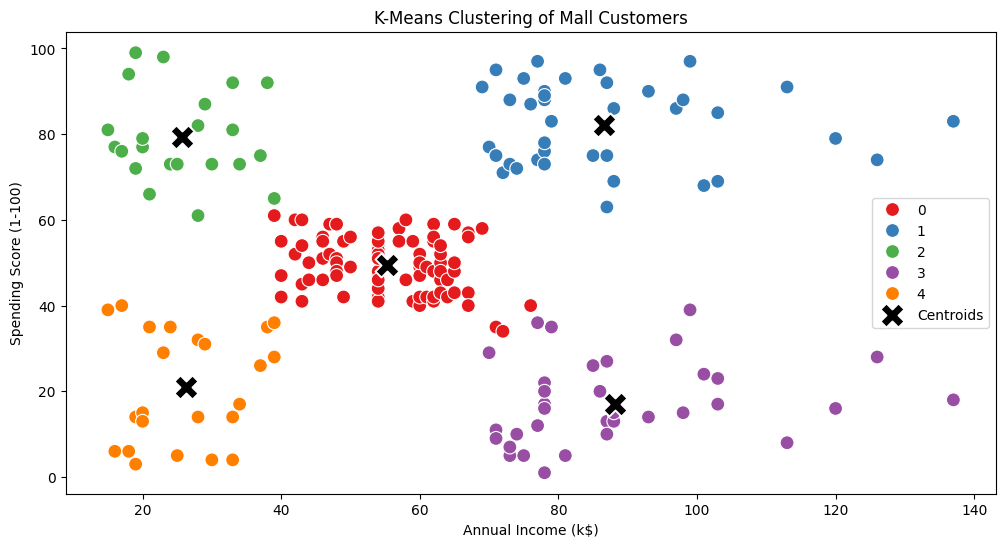

In [14]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_labeled, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='Set1', s=100)
sns.scatterplot(x=centroids[:,0]*scaler.scale_[0] + scaler.mean_[0], 
                y=centroids[:,1]*scaler.scale_[1] + scaler.mean_[1], 
                color='black', s=300, marker='X', label='Centroids')
plt.title('K-Means Clustering of Mall Customers')

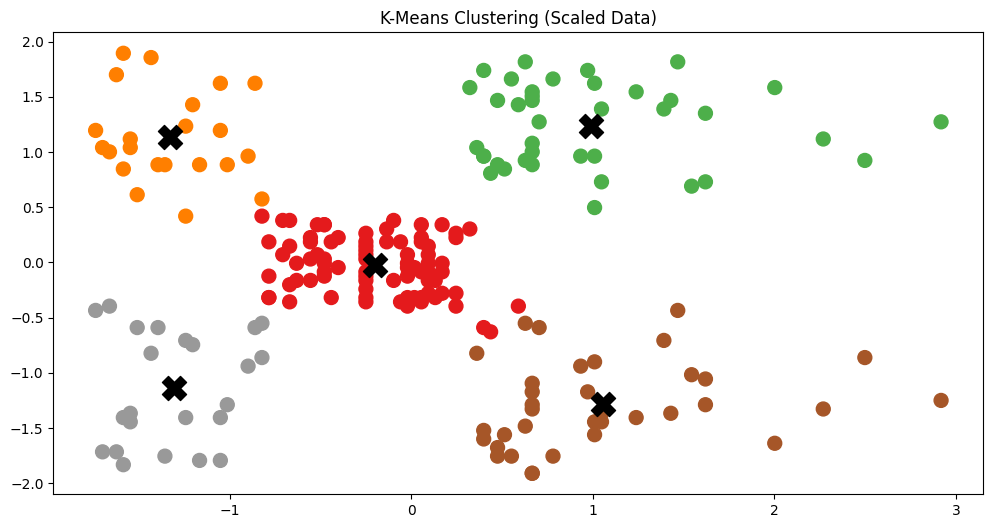

In [15]:
plt.figure(figsize=(12, 6))
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=labels, cmap='Set1', s=100)
plt.scatter(centroids[:,0], centroids[:,1], color='black', s=300, marker='X', label='Centroids')
plt.title('K-Means Clustering (Scaled Data)')
plt.show()

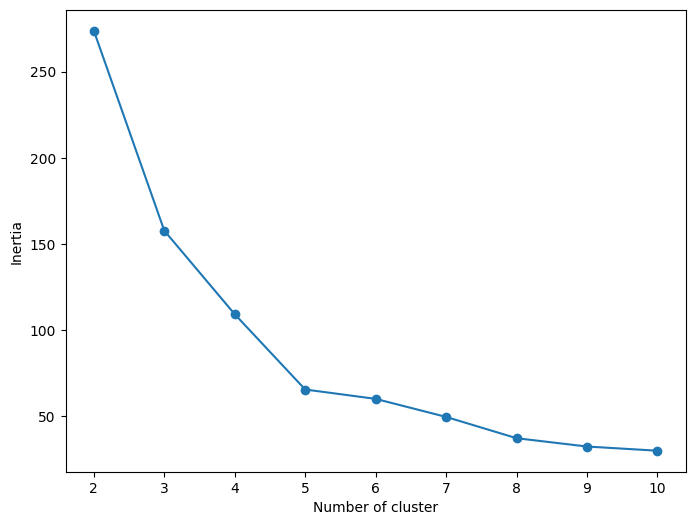

In [16]:
list_k = range(2, 11)
list_inertia = []
for k in list_k:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(X_scaled)
    list_inertia.append(model.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(list_k, list_inertia, 'o-')
plt.xlabel('Number of cluster')
plt.ylabel('Inertia')
plt.show()

In [17]:
from sklearn.metrics import silhouette_score
list_k = range(2, 11)
silhouette_scores = []

for k in list_k:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(X_scaled)

    sil_avg = silhouette_score(X_scaled, model.labels_)
    silhouette_scores.append(sil_avg)

/Users/tungdt/Library/Python/3.13/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/tungdt/Library/Python/3.13/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/tungdt/Library/Python/3.13/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/tungdt/Library/Python/3.13/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/tungdt/Library/Python/3.13/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/tungdt/Library/Python/3.13/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/tungdt/Library/Python/3.13/lib/python/site-packages/sklearn/utils/extma

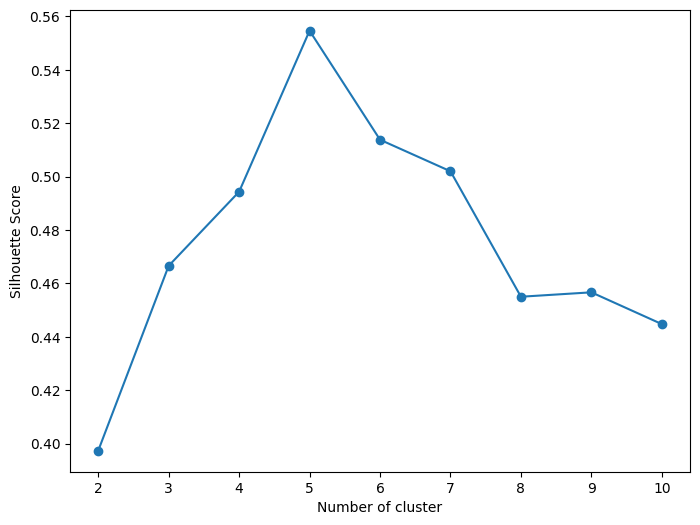

In [19]:
plt.figure(figsize=(8, 6))
plt.plot(list_k, silhouette_scores, 'o-')
plt.xlabel('Number of cluster')
plt.ylabel('Silhouette Score')
plt.show()

In [24]:
from sklearn.datasets import load_wine
df_wine = pd.DataFrame(load_wine().data, columns=load_wine().feature_names)
df_wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [ ]:
# TODO:
# 1. Chọn đặc trưng (2 hoặc nhiều hơn)
# 2. Chuẩn hóa dữ liệu (StandardScaler)
# 3. Chạy KMeans với k từ 2 đến n (tùy chọn)
# 4. Tính inertia vẽ elbow plot
# 5. Tính silhouette score và vẽ silhouette plot
# 6. Kết luận k nào là hợp lý